Ngô Phú Thịnh
19110454

In [12]:
from enum import Enum, auto
from bai1 import mean,std
from scipy.stats import norm, t

# Bai 1

In [13]:
import math
def mean(data:list[int]):
    return sum(data)/len(data)

def kd2mtd(data1:list[int],data2:list[int],loaiKD:str,alpha:float,gtps=str,sigma1:float=None,sigma2:float=None):
    assert loaiKD in ['lon', 'nho', 'khac'], 'Loại kiểm định phải là lon,nho hoặc khac'
    assert isinstance(data1, list), 'Dữ liệu phải là list.'
    assert isinstance(data2, list), 'Dữ liệu phải là list.'
    assert isinstance(alpha, (int, float)), 'Mức ý nghĩa thống kê phải là số.'
    assert isinstance(sigma1, (int, float)
                      ) or sigma1 == None, 'Sigma1 phải là số hoặc None.'
    assert isinstance(sigma2, (int, float)
                      ) or sigma2 == None, 'Sigma2 phải là số hoặc None.'
    assert 0 < alpha < 1, 'Mức ý nghĩa thống kê phải nằm trong khoảng (0,1).'
    
    n = len(data1)
    m = len(data2)
    mean1 = mean(data1)
    mean2 = mean(data2)
    s1 = std(data1)
    s2 = std(data2)
    if sigma1 != None and sigma2 != None:
        z0 = (mean1-mean2)/(sigma1**2/n+sigma2**2/m)**0.5
        if loaiKD == 'lon':
            p_value = 1-norm.cdf(z0)
        elif loaiKD == 'nho':
            p_value = norm.cdf(z0)
        elif loaiKD == 'khac':
            p_value = 2*(1-norm.cdf(abs(z0)))

    elif (sigma1 == None and sigma2 == None) and gtps == 'bang':
        sp = ((n-1)*s1+(m-1)*s2)/(n+m-2)
        tu = mean1-mean2
        mau = sp*((1/n)+(1/m))**0.5
        t0 = tu/mau
        if loaiKD == 'lon':
            p_value = 1-t.cdf(t0,n+m-2)
        elif loaiKD == 'nho':
            p_value = t.cdf(t0,n+m-2)
        elif loaiKD == 'khac':
            p_value = 2*(1-t.cdf(abs(t0),n+m-2))

    elif (sigma1 == None and sigma2 == None) and gtps == 'khac':
        t0 = (mean1-mean2)/((s1**2/n+s2**2/m)**0.5)
        v = int(((s1**2/n)**2 + (s2**2/m)**2)/((s1**2/n)**2/(n-1)+(s2**2/m)**2/(m-1)))
        if loaiKD == 'lon':
            p_value = 1-t.cdf(t0,v)
        elif loaiKD == 'nho':
            p_value = t.cdf(t0,v)
        elif loaiKD == 'khac':
            p_value = 2*(1-t.cdf(abs(t0),v))
    if p_value <= alpha:
        return p_value,'bac bo H0'
    return p_value,'khong du co so bac bo H0'

In [14]:
from scipy.stats import ttest_ind

In [15]:
d1 = [9.9,10.6,9.4,10.3,9.3,10,9.6,10.3,10.2,10.1]
d2 = [10.2,10,10.6,10.2,10.7,10.7,10.4,10.4,10.5,10.3]
print(kd2mtd(d1,d2,'khac',0.05,'khac'))
# kiem tra
print(ttest_ind(d1,d2,equal_var=True,alternative='two-sided'))

(0.019792309184070378, 'bac bo H0')
Ttest_indResult(statistic=-2.8278324265381225, pvalue=0.011150646764286247)


In [16]:
d1 = [0.047,0.060,0.061,0.064,0.080,0.090,0.118,0.165,0.183]
d2 = [0.062,0.105,0.118,0.137,0.153,0.197,0.210,0.250,0.375]
print(kd2mtd(d1,d2,'nho',0.05,'bang'))
# kiem tra
print(ttest_ind(d1,d2,equal_var=True,alternative='less'))

(0.013173632473557455, 'bac bo H0')
Ttest_indResult(statistic=-2.3339376601777335, pvalue=0.016482921191557177)


# bai 2

In [17]:
from scipy import linalg

def hqdb(data:list[list[int]],loaihq:str):
    assert loaihq in ['bac1','bac2'], 'Loại hình quy đổi phải là bac1 hoặc bac2'
    assert isinstance(data, list), 'Dữ liệu phải là list.'
    assert len(data) == 2, 'Dữ liệu phải là 2xN.'
    assert len(data[0]) == len(data[1]), 'Dữ liệu phải là 2xN.'
    
    n = len(data[0])
    if loaihq == 'bac1':
        Sxy = sum([data[0][i]*data[1][i] for i in range(n)])
        Sx = sum(data[0])
        Sxx = sum([data[0][i]**2 for i in range(n)])
        Sy = sum(data[1])
        B1_tu = Sxy - Sx*Sy/n
        B1_mau = Sxx - Sx**2/n
        B1 = B1_tu/B1_mau

        B0 = Sy/n - B1*Sx/n
        return B0,B1
    
    if loaihq =='bac2':
        Sx = sum(data[0])
        Sxx = sum([data[0][i]**2 for i in range(n)]) 
        Sxxx = sum([data[0][i]**3 for i in range(n)])
        Sxxxx = sum([data[0][i]**4 for i in range(n)])
        Sy = sum(data[1])
        Sxy = sum([data[0][i]*data[1][i] for i in range(n)])
        Sxxy = sum([data[0][i]**2*data[1][i] for i in range(n)])

        a = [
            [n,Sx,Sxx],
            [Sx,Sxx,Sxxx],
            [Sxx,Sxxx,Sxxxx]
        ]
        b = [Sy,Sxy,Sxxy]
        B = linalg.solve(a,b)
        return B

In [18]:
y = [40,42,49,46,44,48,46,43,53,52,54,57,68]
x = [825,830,890,895,890,910,915,960,990,1010,1012,1030,1050]

data = [x,y]
a,b = hqdb(data,'bac1')
print(a,b)
# kiem tra
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit([[i] for i in x],y)
print(lr.intercept_,lr.coef_[0])


-31.285968990291394 0.08591116546848432
-31.285968990291394 0.08591116546848432


# Bai 3

In [19]:
# a) tinh phuong sai + ve do thi
var = 0
for i in range(len(x)):
    var += (y[i] - a - b*x[i])**2
var = (var/(len(x)-2))
print(var)

17.11169181622303


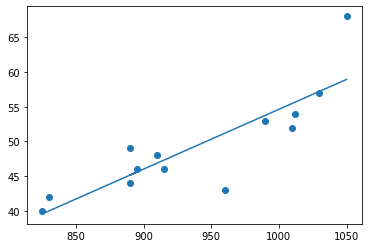

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,[a+b*i for i in x])
plt.show()

In [21]:
#b
x_val = 910
y_val = a + b*x_val
print(y_val)
residual = abs(y_val - 48)
print(residual)

46.89319158602933
1.1068084139706684


In [22]:
#c
x_val = 950
y_val = a + b*x_val
print(y_val)

50.32963820476871
